<a href="https://colab.research.google.com/github/Chanwoochan/MOTOR/blob/main/%EC%88%98%EC%A0%95Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# 치형계수
y_v = [0.277, 0.292, 0.308, 0.319, 0.325, 0.33 , 0.335, 0.34 , 0.346,
        0.352, 0.354, 0.359, 0.363, 0.367, 0.372, 0.377, 0.383, 0.388,
        0.394, 0.4  , 0.404, 0.407, 0.411, 0.413, 0.418, 0.422, 0.424,
        0.428, 0.431, 0.433, 0.436, 0.44 , 0.443, 0.445, 0.45 , 0.454,
        0.464, 0.474, 0.484]
y_n = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
       25, 26, 28, 30, 32, 34, 36, 38, 40, 42, 43, 45,
       48, 50, 52, 55, 58, 60, 65, 70, 75, 80, 90, 100,
       150, 300, 100000000]

In [141]:
def sel_y(N): # 치형계수 선택과 선형보간값 반환
  temp = N
  if N in y_n :
    n = y_n.index(N)
    return y_v[n]
  while 1:
    temp = temp + 1
    if temp in y_n :
      n = y_n.index(temp)
      break
  value = (y_v[n-1]*(y_n[n]-N)+y_v[n]*(N-y_n[n-1]))/(y_n[n]-y_n[n-1])
  return value

In [142]:
def bending(sigb,m,b,y,fv,fw) : # 굽힘강도 계산
  P = sigb*b*m*y*fv*fw
  return P

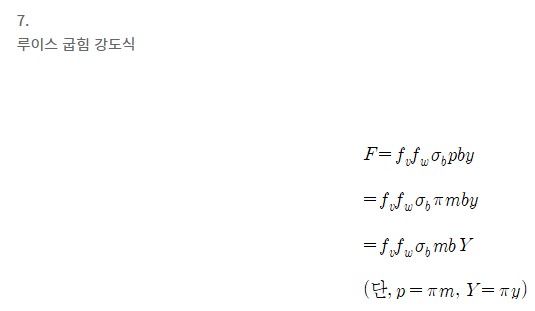

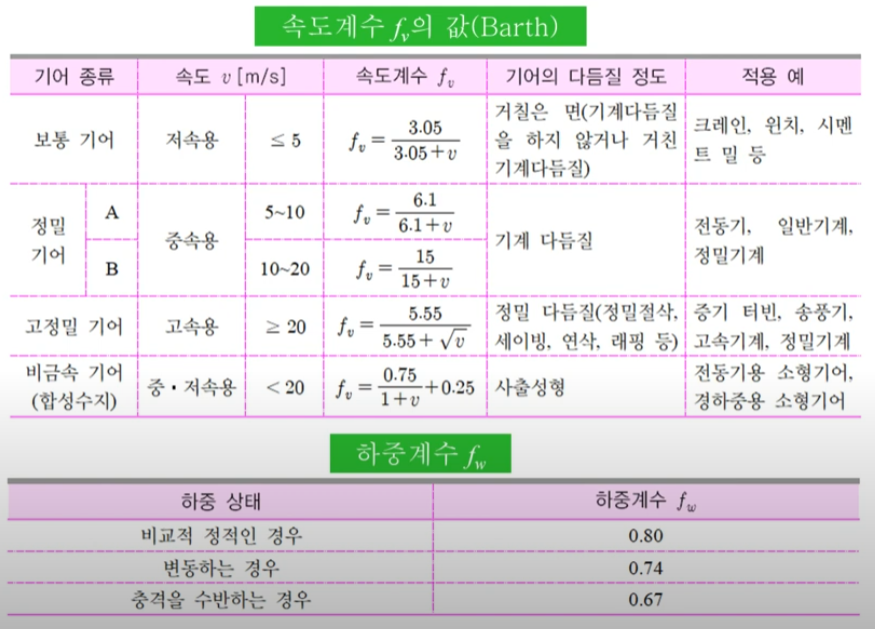

In [143]:
def f_v(v) : # 굽힘강도 계산
  if v <= 5 :               fv = 3.05/(3.05+v)
  elif v > 5 and v <= 10 :  fv = 6.1/(6.1+v)
  elif v > 10 and v <= 20 : fv = 15/(15+v)
  elif v > 20 :             fv = 5.55/(5.55+v**0.5)
  else :                    fv = 0
  return fv

<br><br>

# sun_gear 의 굽힘강도 계산

In [144]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = 2000 #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = sel_y(N)
fv = f_v(v)
fw = 0.8

sigb, m, b, N, rpm, v, y, fv, fw

(490, 1, 10, 21, 2000, 2.199114857512855, 0.352, 0.5810503452090885, 0.8)

In [145]:
print('최대 힘 :', bending(sigb,m,b,y,fv,fw),"N")
print('최대 토크 :', bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2 ,"Nm")

최대 힘 : 801.7565083333087 N
최대 토크 : 8.418443337499742 Nm


In [146]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = np.arange(0,50000,1) #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = sel_y(N)
fv = np.zeros(50000)
for i in range(50000) :
  fv[i] = f_v(v[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2

Text(0, 0.5, 'Max Torqe')

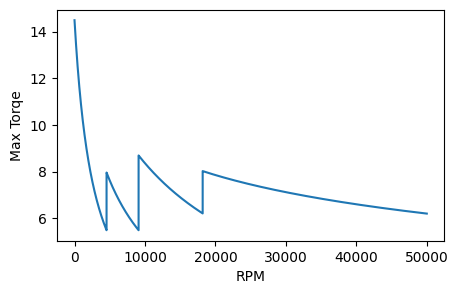

In [147]:
plt.figure(figsize=(5,3))
plt.plot(rpm, y_T)
plt.xlabel('RPM')
plt.ylabel('Max Torqe')

<br><br>

# planet_gear 의 굽힘강도 계산

In [148]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = 1000 #rpm
v = (rpm * np.pi/30) * (.021) # m/s
y = sel_y(N)
fv = f_v(v)
fw = 0.8

sigb, m, b, N, rpm, v, y, fv, fw

(490, 1, 10, 21, 1000, 2.199114857512855, 0.352, 0.5810503452090885, 0.8)

In [149]:
print('최대 힘 :', bending(sigb,m,b,y,fv,fw),"N")
print('최대 토크 :', bending(sigb,m,b,y,fv,fw) * (.021)  ,"Nm")

최대 힘 : 801.7565083333087 N
최대 토크 : 16.836886674999484 Nm


In [150]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = np.arange(0,50000,1) #rpm
v = (rpm * np.pi/30) * (.021) # m/s
y = sel_y(N)
fv = np.zeros(50000)
for i in range(50000) :
  fv[i] = f_v(v[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (.021)

Text(0, 0.5, 'Max Torqe')

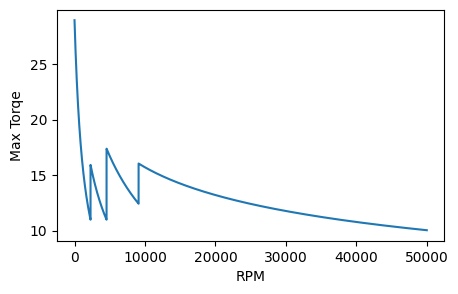

In [151]:
plt.figure(figsize=(5,3))
plt.plot(rpm, y_T)
plt.xlabel('RPM')
plt.ylabel('Max Torqe')

# 두번째 캐리어

<br><br>

# sun_gear 의 굽힘강도 계산

In [152]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = 500 #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = sel_y(N)
fv = f_v(v)
fw = 0.8

sigb, m, b, N, rpm, v, y, fv, fw

(490, 1, 10, 21, 500, 0.5497787143782138, 0.352, 0.8472743026724695, 0.8)

In [153]:
print('최대 힘 :', bending(sigb,m,b,y,fv,fw),"N")
print('최대 토크 :', bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2 ,"Nm")

최대 힘 : 1169.1029737995802 N
최대 토크 : 12.275581224895593 Nm


In [154]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = np.arange(0,50000,1) #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = sel_y(N)
fv = np.zeros(50000)
for i in range(50000) :
  fv[i] = f_v(v[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2

Text(0, 0.5, 'Max Torqe')

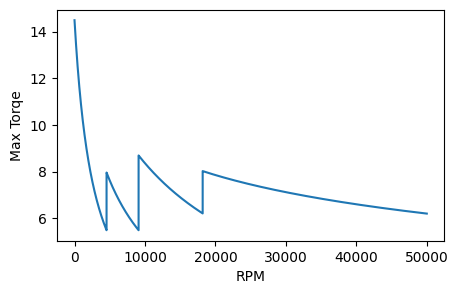

In [155]:
plt.figure(figsize=(5,3))
plt.plot(rpm, y_T)
plt.xlabel('RPM')
plt.ylabel('Max Torqe')

<br><br>

# planet_gear 의 굽힘강도 계산

In [156]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = 1000 #rpm
v = (rpm * np.pi/30) * (.021) # m/s
y = sel_y(N)
fv = f_v(v)
fw = 0.8

sigb, m, b, N, rpm, v, y, fv, fw

(490, 1, 10, 21, 1000, 2.199114857512855, 0.352, 0.5810503452090885, 0.8)

In [157]:
print('최대 힘 :', bending(sigb,m,b,y,fv,fw),"N")
print('최대 토크 :', bending(sigb,m,b,y,fv,fw) * (.021)  ,"Nm")

최대 힘 : 801.7565083333087 N
최대 토크 : 16.836886674999484 Nm


In [158]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = 21
rpm = np.arange(0,50000,1) #rpm
v = (rpm * np.pi/30) * (.021) # m/s
y = sel_y(N)
fv = np.zeros(50000)
for i in range(50000) :
  fv[i] = f_v(v[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (.021)

Text(0, 0.5, 'Max Torqe')

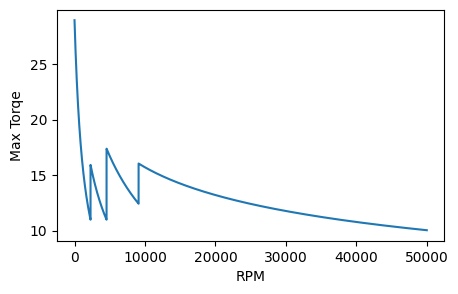

In [159]:
plt.figure(figsize=(5,3))
plt.plot(rpm, y_T)
plt.xlabel('RPM')
plt.ylabel('Max Torqe')

<br><br><br><br><br>

# 썬기어 잇수별 최대토크

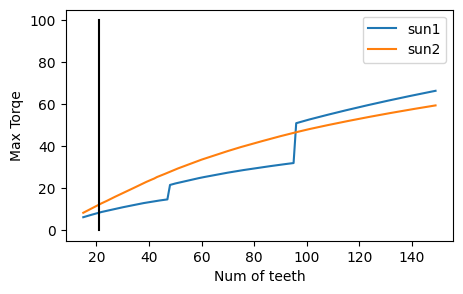

In [160]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = np.arange(15,150,1)
rpm = 2000 #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = np.zeros(150-15)
fv = np.zeros(150-15)
for i in range(150-15) :
  fv[i] = f_v(v[i])
for i in range(150-15) :
  y[i] = sel_y(N[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2
plt.figure(figsize=(5,3))
plt.plot(N, y_T, label='sun1')
N = np.arange(15,150,1)
rpm = 500 #rpm
v = (rpm * np.pi/30) * (N * m * .001)/2 # m/s
y = np.zeros(150-15)
fv = np.zeros(150-15)
for i in range(150-15) :
  fv[i] = f_v(v[i])
for i in range(150-15) :
  y[i] = sel_y(N[i])
y_T = bending(sigb,m,b,y,fv,fw) * (N * m * .001)/2
plt.plot(N, y_T, label='sun2')
plt.xlabel('Num of teeth')
plt.ylabel('Max Torqe')
plt.legend()
plt.plot([21,21], [0,100], color='black');


<br>

# 플래닛기어 잇수별 최대토크

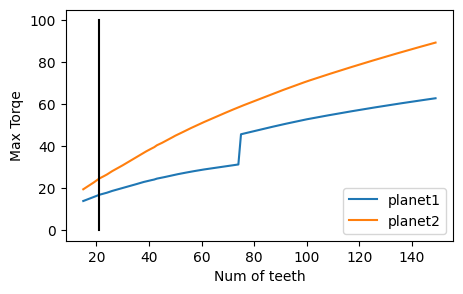

In [161]:
sigb = 490 # N/mm^2
m = 1
b = 10 # mm
N = np.arange(15,150,1)
rpm = 1000 #rpm
v = (rpm * np.pi/30) * (N*.001+0.021)/2 # m/s
y = np.zeros(150-15)
fv = np.zeros(150-15)
for i in range(150-15) :
  fv[i] = f_v(v[i])
for i in range(150-15) :
  y[i] = sel_y(N[i])
fw = 0.8
y_T = bending(sigb,m,b,y,fv,fw) * (N*.001+0.021)/2
plt.figure(figsize=(5,3))
plt.plot(N, y_T, label='planet1')
N = np.arange(15,150,1)
rpm = 250 #rpm
v = (rpm * np.pi/30) * (N*.001+0.021)/2 # m/s
y = np.zeros(150-15)
fv = np.zeros(150-15)
for i in range(150-15) :
  fv[i] = f_v(v[i])
for i in range(150-15) :
  y[i] = sel_y(N[i])
y_T = bending(sigb,m,b,y,fv,fw) * (N*.001+0.021)/2
plt.plot(N, y_T, label='planet2')
plt.xlabel('Num of teeth')
plt.ylabel('Max Torqe')
plt.plot([21,21], [0,100], color='black')
plt.legend();
